In [1]:
import os
import sys

os.chdir("..")
sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from src.utils.features import decomps_and_features

In [3]:
orig_data = np.concatenate(
    [
        np.load("data/electricity_nips/train_past_target.npy"),
        np.load("data/electricity_nips/train_future_target.npy"),
    ],
    axis=1,
)
transformed_data = np.concatenate(
    [
        np.load("data/electricity_nips_alternative/train_past_target.npy"),
        np.load("data/electricity_nips_alternative/train_future_target.npy"),
    ],
    axis=1,
)
augmented_data = np.concatenate(
    [
        np.load("data/electricity_nips_augmented/train_past_target.npy"),
        np.load("data/electricity_nips_augmented/train_future_target.npy"),
    ],
    axis=1,
)

In [4]:
_, orig_features = decomps_and_features(orig_data, 24)
_, transformed_features = decomps_and_features(transformed_data, 24)
_, augmented_features = decomps_and_features(augmented_data, 24)

25600it [01:20, 317.83it/s]
25600it [01:21, 314.18it/s]
51200it [02:39, 321.75it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


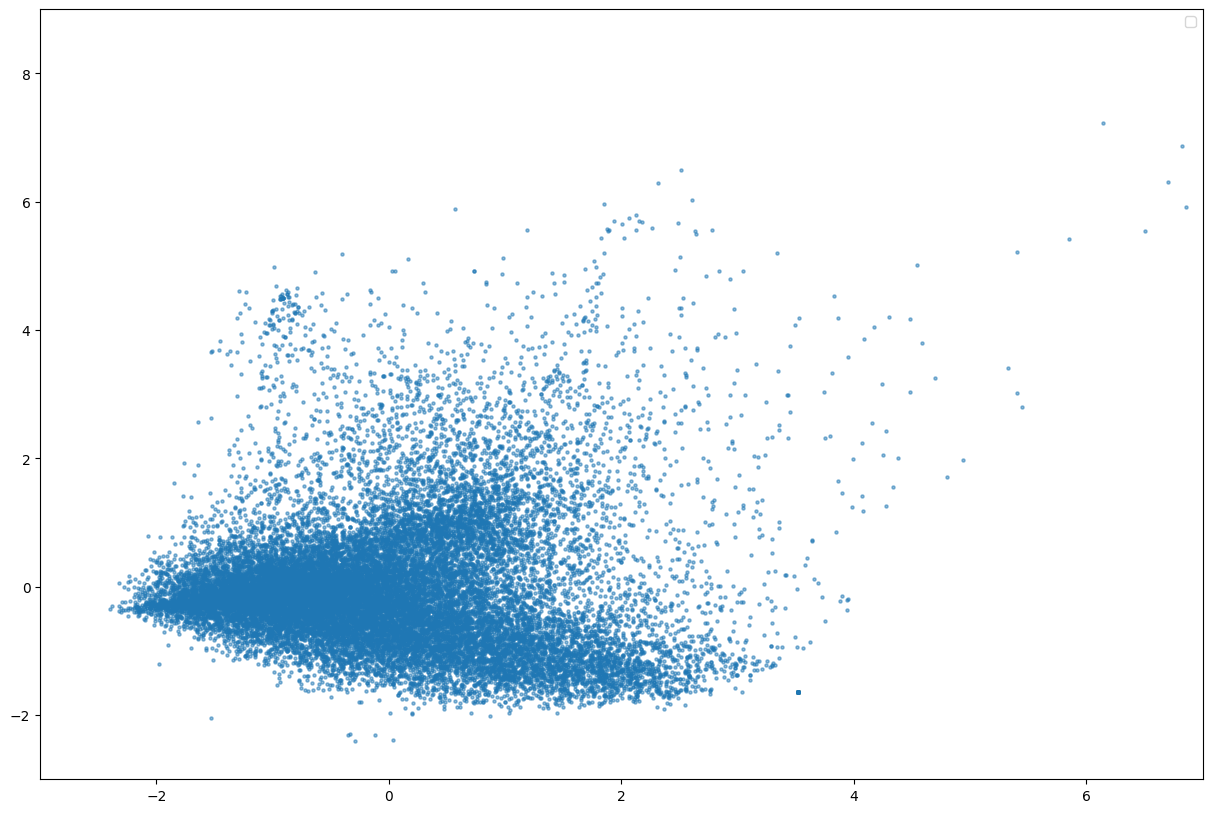

In [5]:
scaler = StandardScaler()
norm_orig_features = scaler.fit_transform(orig_features)
norm_transformed_features = scaler.transform(transformed_features)
norm_augmented_features = scaler.transform(augmented_features)


pca = PCA(n_components=2)
orig_pca_data = pca.fit_transform(norm_orig_features)
transformed_pca_data = pca.transform(norm_transformed_features)
combined_pca_data = pca.transform(norm_augmented_features)

plt.figure(figsize=(15, 10))
plt.scatter(
    orig_pca_data[:, 0], orig_pca_data[:, 1], s=5, alpha=0.5
)
plt.ylim([-3, 9])
plt.xlim([-3, 7])
plt.legend()

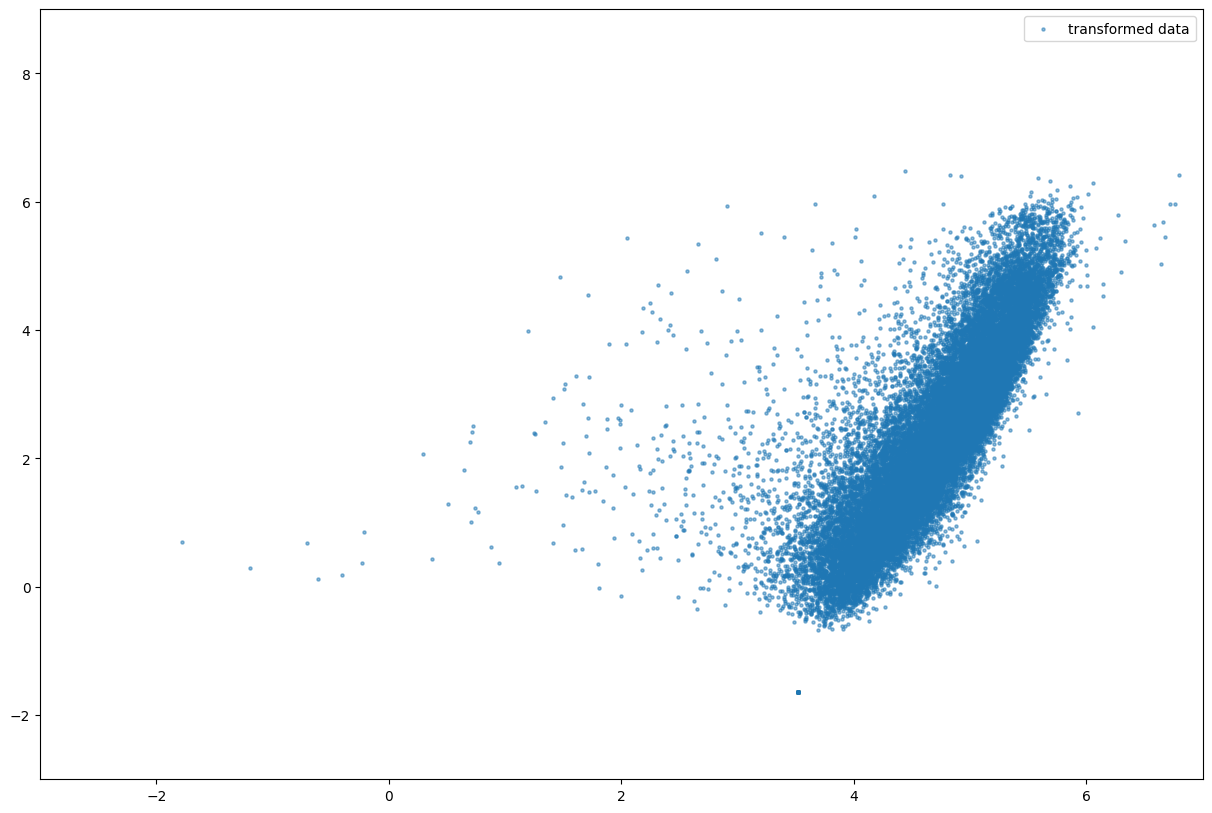

In [6]:
plt.figure(figsize=(15, 10))
plt.scatter(
    transformed_pca_data[:, 0],
    transformed_pca_data[:, 1],
    label="transformed data",
    s=5,
    alpha=0.5,
)
plt.ylim([-3, 9])
plt.xlim([-3, 7])
plt.legend()

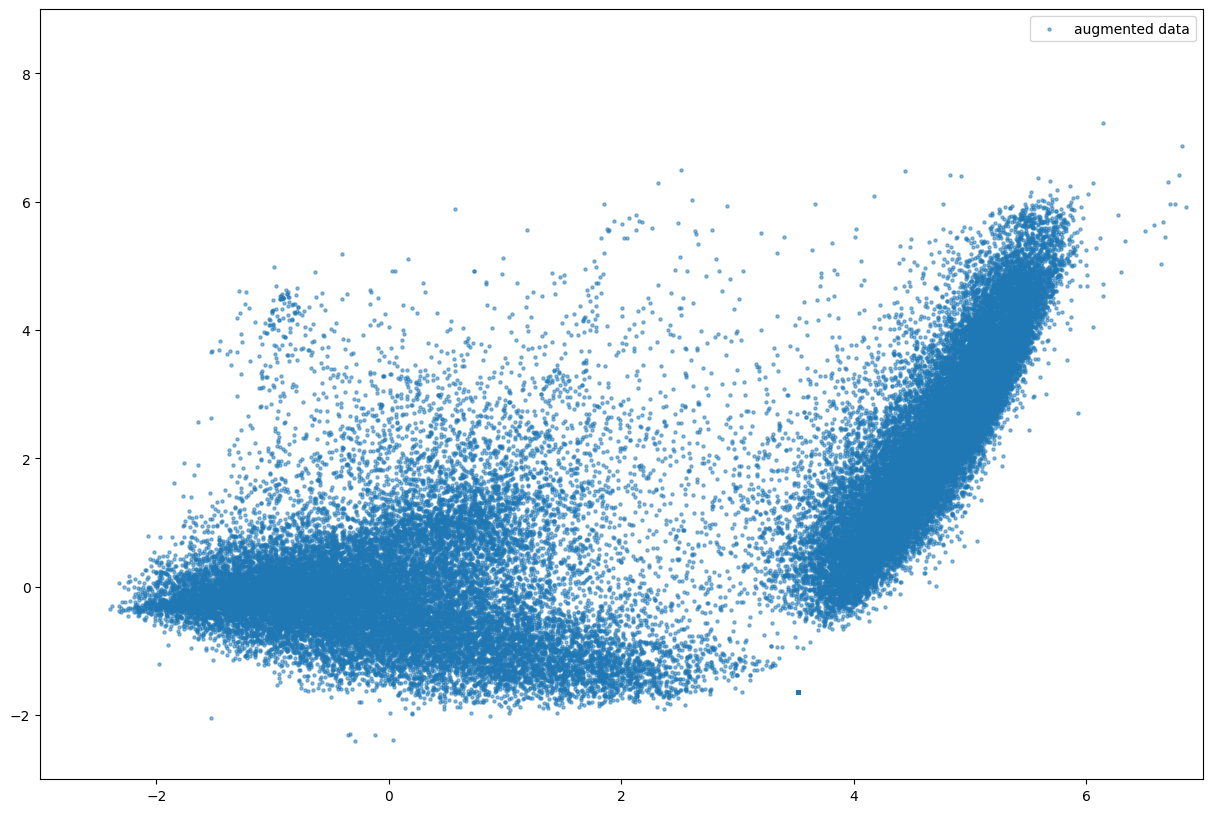

In [7]:
plt.figure(figsize=(15, 10))
plt.scatter(
    combined_pca_data[:, 0],
    combined_pca_data[:, 1],
    label="augmented data",
    s=5,
    alpha=0.5,
)
plt.ylim([-3, 9])
plt.xlim([-3, 7])
plt.legend()